# Machine Learning for Texts Project
# *Movie_reviews_classification_with_BERT*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Features-analysis" data-toc-modified-id="Features-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Features analysis</a></span></li><li><span><a href="#Target-analysis" data-toc-modified-id="Target-analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Target analysis</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Normalization</a></span></li></ul></li><li><span><a href="#Evaluation-Procedure" data-toc-modified-id="Evaluation-Procedure-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluation Procedure</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Train / Test Split</a></span></li><li><span><a href="#Working-with-models" data-toc-modified-id="Working-with-models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Working with models</a></span><ul class="toc-item"><li><span><a href="#Model-1---Constant" data-toc-modified-id="Model-1---Constant-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Model 1 - Constant</a></span></li><li><span><a href="#Model-2---NLTK,-TF-IDF-and-LR" data-toc-modified-id="Model-2---NLTK,-TF-IDF-and-LR-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Model 2 - NLTK, TF-IDF and LR</a></span></li><li><span><a href="#Model-3---spaCy,-TF-IDF-and-LR" data-toc-modified-id="Model-3---spaCy,-TF-IDF-and-LR-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Model 3 - spaCy, TF-IDF and LR</a></span></li><li><span><a href="#Model-4---spaCy,-TF-IDF-and-LGBMClassifier" data-toc-modified-id="Model-4---spaCy,-TF-IDF-and-LGBMClassifier-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Model 4 - spaCy, TF-IDF and LGBMClassifier</a></span></li><li><span><a href="#Model-5---BERT" data-toc-modified-id="Model-5---BERT-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Model 5 - BERT</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Sanity check</a></span></li><li><span><a href="#My-Reviews" data-toc-modified-id="My-Reviews-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>My Reviews</a></span><ul class="toc-item"><li><span><a href="#Model-2" data-toc-modified-id="Model-2-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Model 4</a></span></li></ul></li></ul></div>

## Goal

Develop a classification model for the Film Junky Union, a new edgy community for classic movie enthusiasts, that automatically detects negative reviews. 

We'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. 

The F1 score on the test set should be at least 0.85.

## Data description

*The data was provided by Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). **Learning Word Vectors for Sentiment Analysis.** The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).*

Here's the description of the selected fields:

**Features**

- `review`: the review text

**Target**

- `pos`: the target, '0' for negative and '1' for positive.

**Other**

- `ds_part`: 'train'/'test' for the train/test part of dataset, correspondingly.

## Imports

In [1]:
pip install huggingface-hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math

import numpy as np
import pandas as pd
import spacy
import en_core_web_sm
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from nltk.corpus import stopwords
import spacy

import torch
import transformers

from tqdm.auto import tqdm

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

C:\Users\anna\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()
print("Setup Complete")

Setup Complete


## Input data

In [5]:
try:
    df_reviews = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/Machine Learning for Texts/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
    
except:
    df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

## Descriptive statistics

In [6]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

Notes for preprocessing:
- There are more than 47k observations with 16 features and 2 target variables;
- Only 2 missing values in both `average_rating` and `votes` columns, we can simply remove them;
- Some values are still unknown but filled with dummy values;
- Check for duplicates;
- The `sp` column can be dropped as it repeats the `pos` column (the latter is numeric);
- We will start developing a model with only the `review` column and then we'll see whether the score gets better if we add more features;
- The target is categorical, it's a classification task.

## EDA
### Features analysis

Let's check the number of movies and reviews over the years.

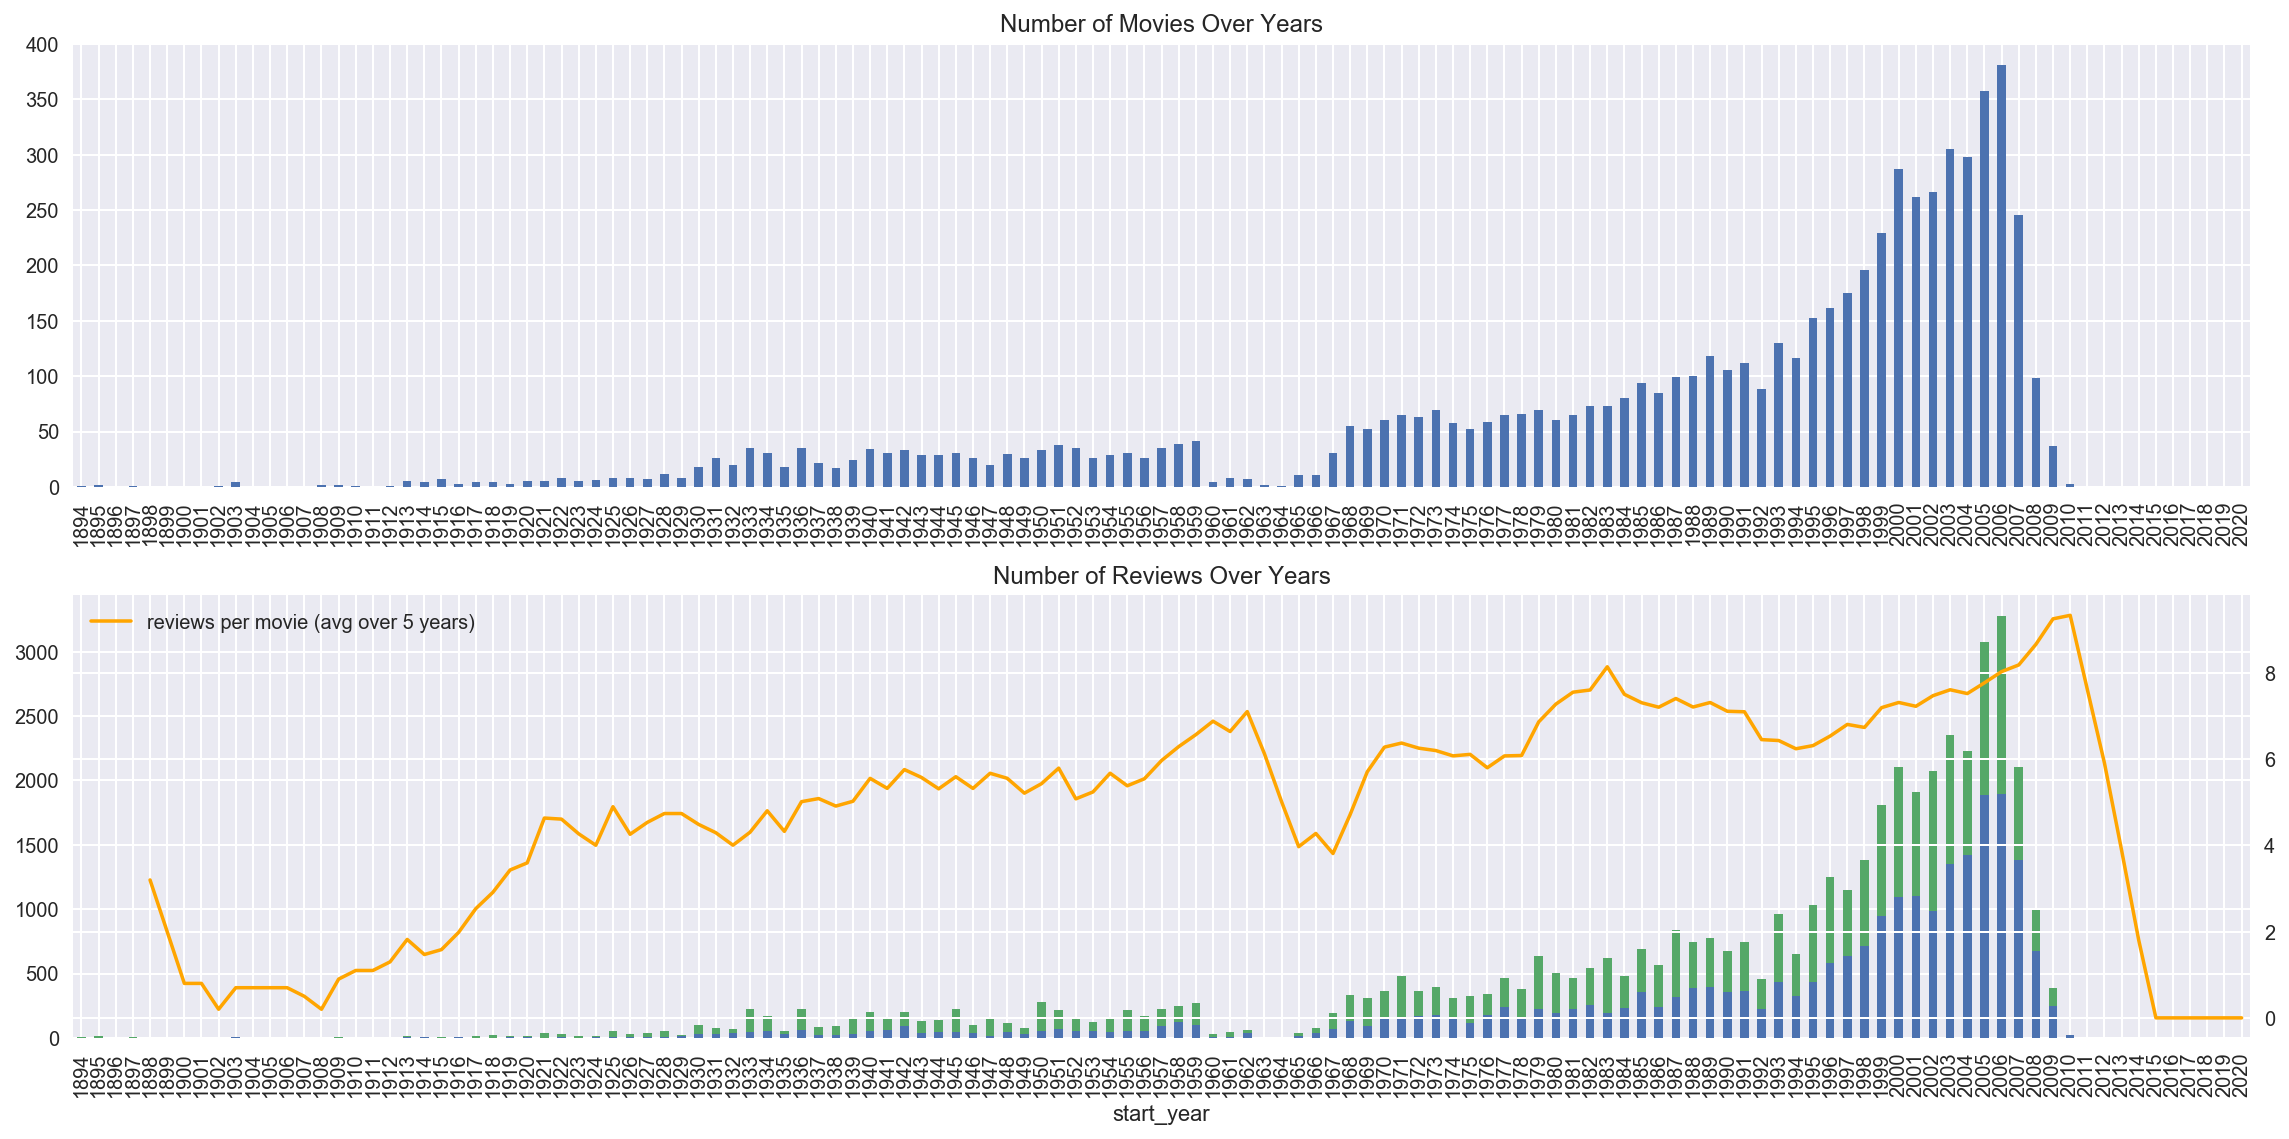

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

We see the overall tendency of the growth of movie reviews over the years, with the peak being in 2006.

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

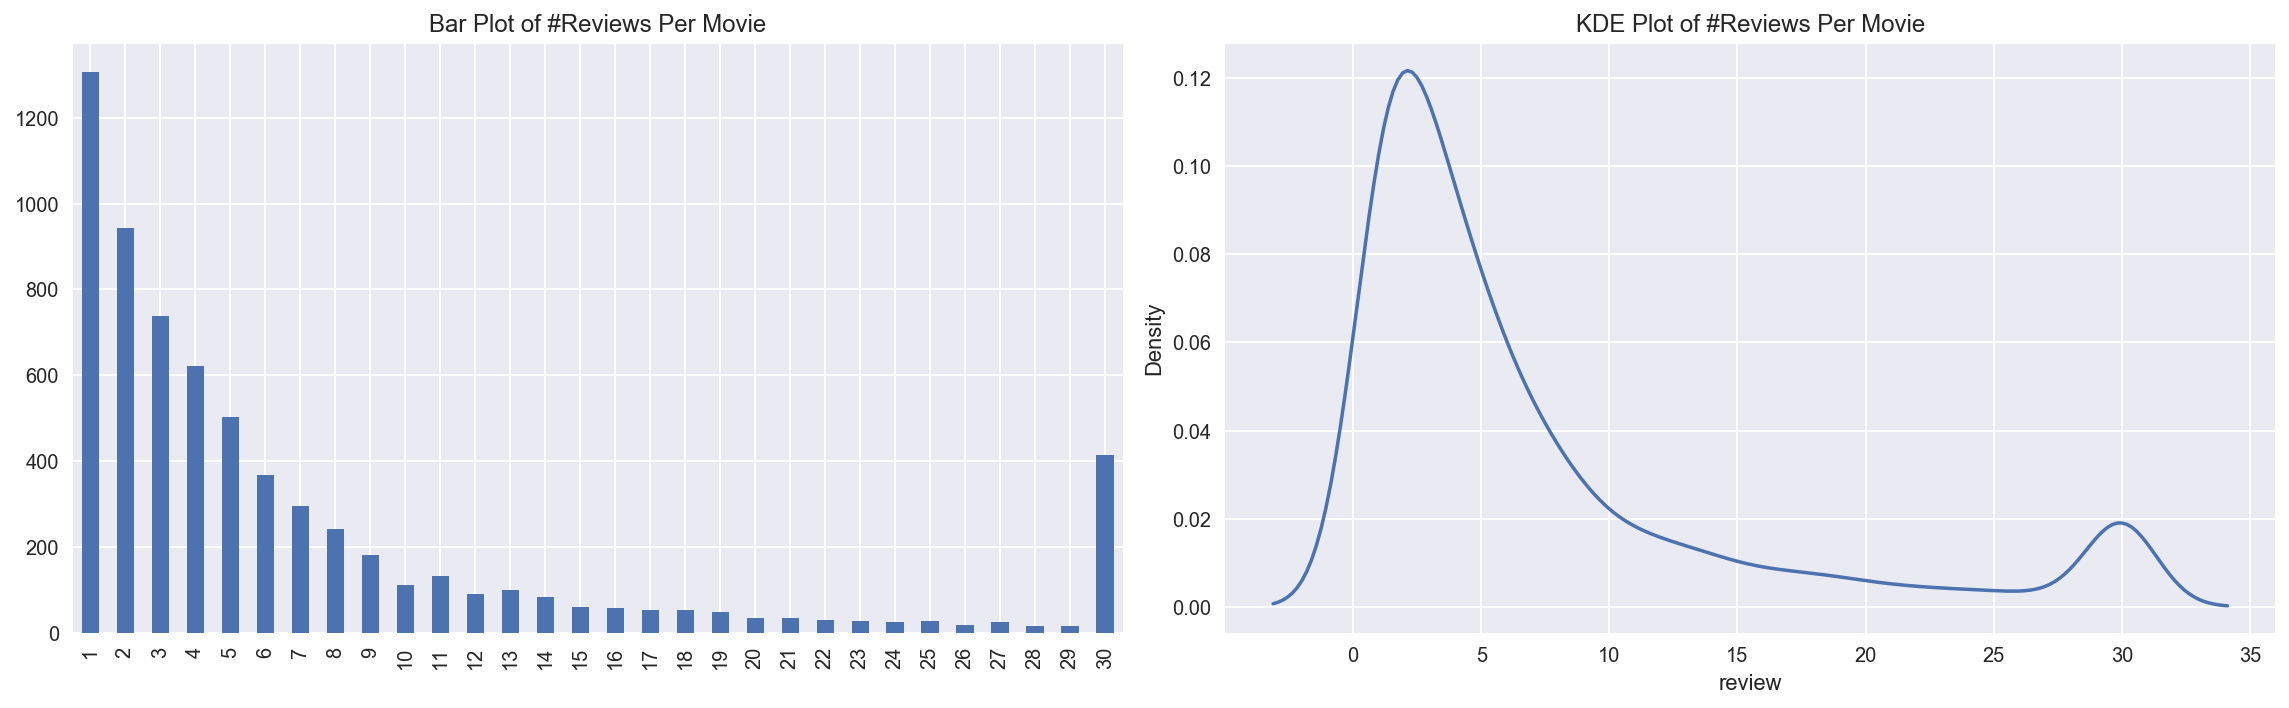

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Most often there is just one or a few reviews per movie, although more than 400 movies (probably the most popular ones) have 30 reviews.

Now let's see whether the overall distribution of ratings differs among the train and test sets.

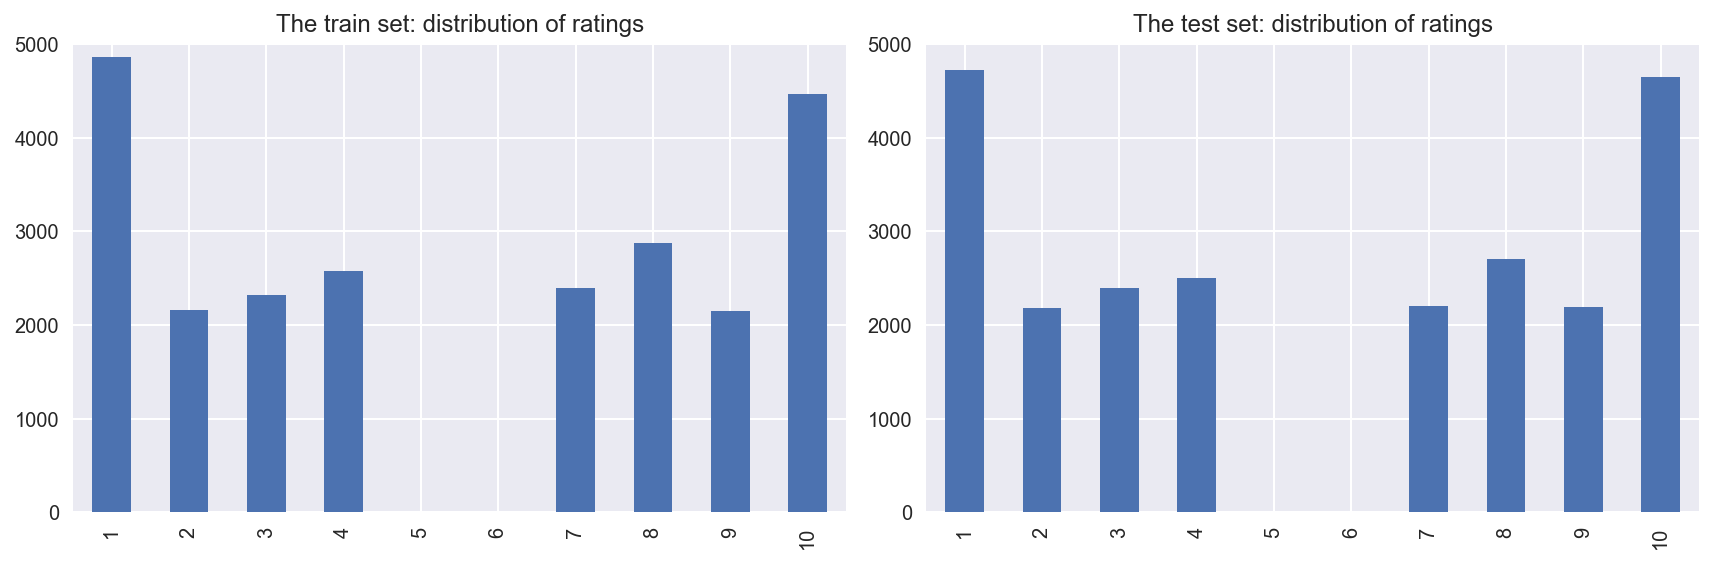

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

The distributions are quite similar, we could probably use this feature in our model.

### Target analysis
Let's analyze the distribution of negative and positive reviews over the years for two parts of the dataset.

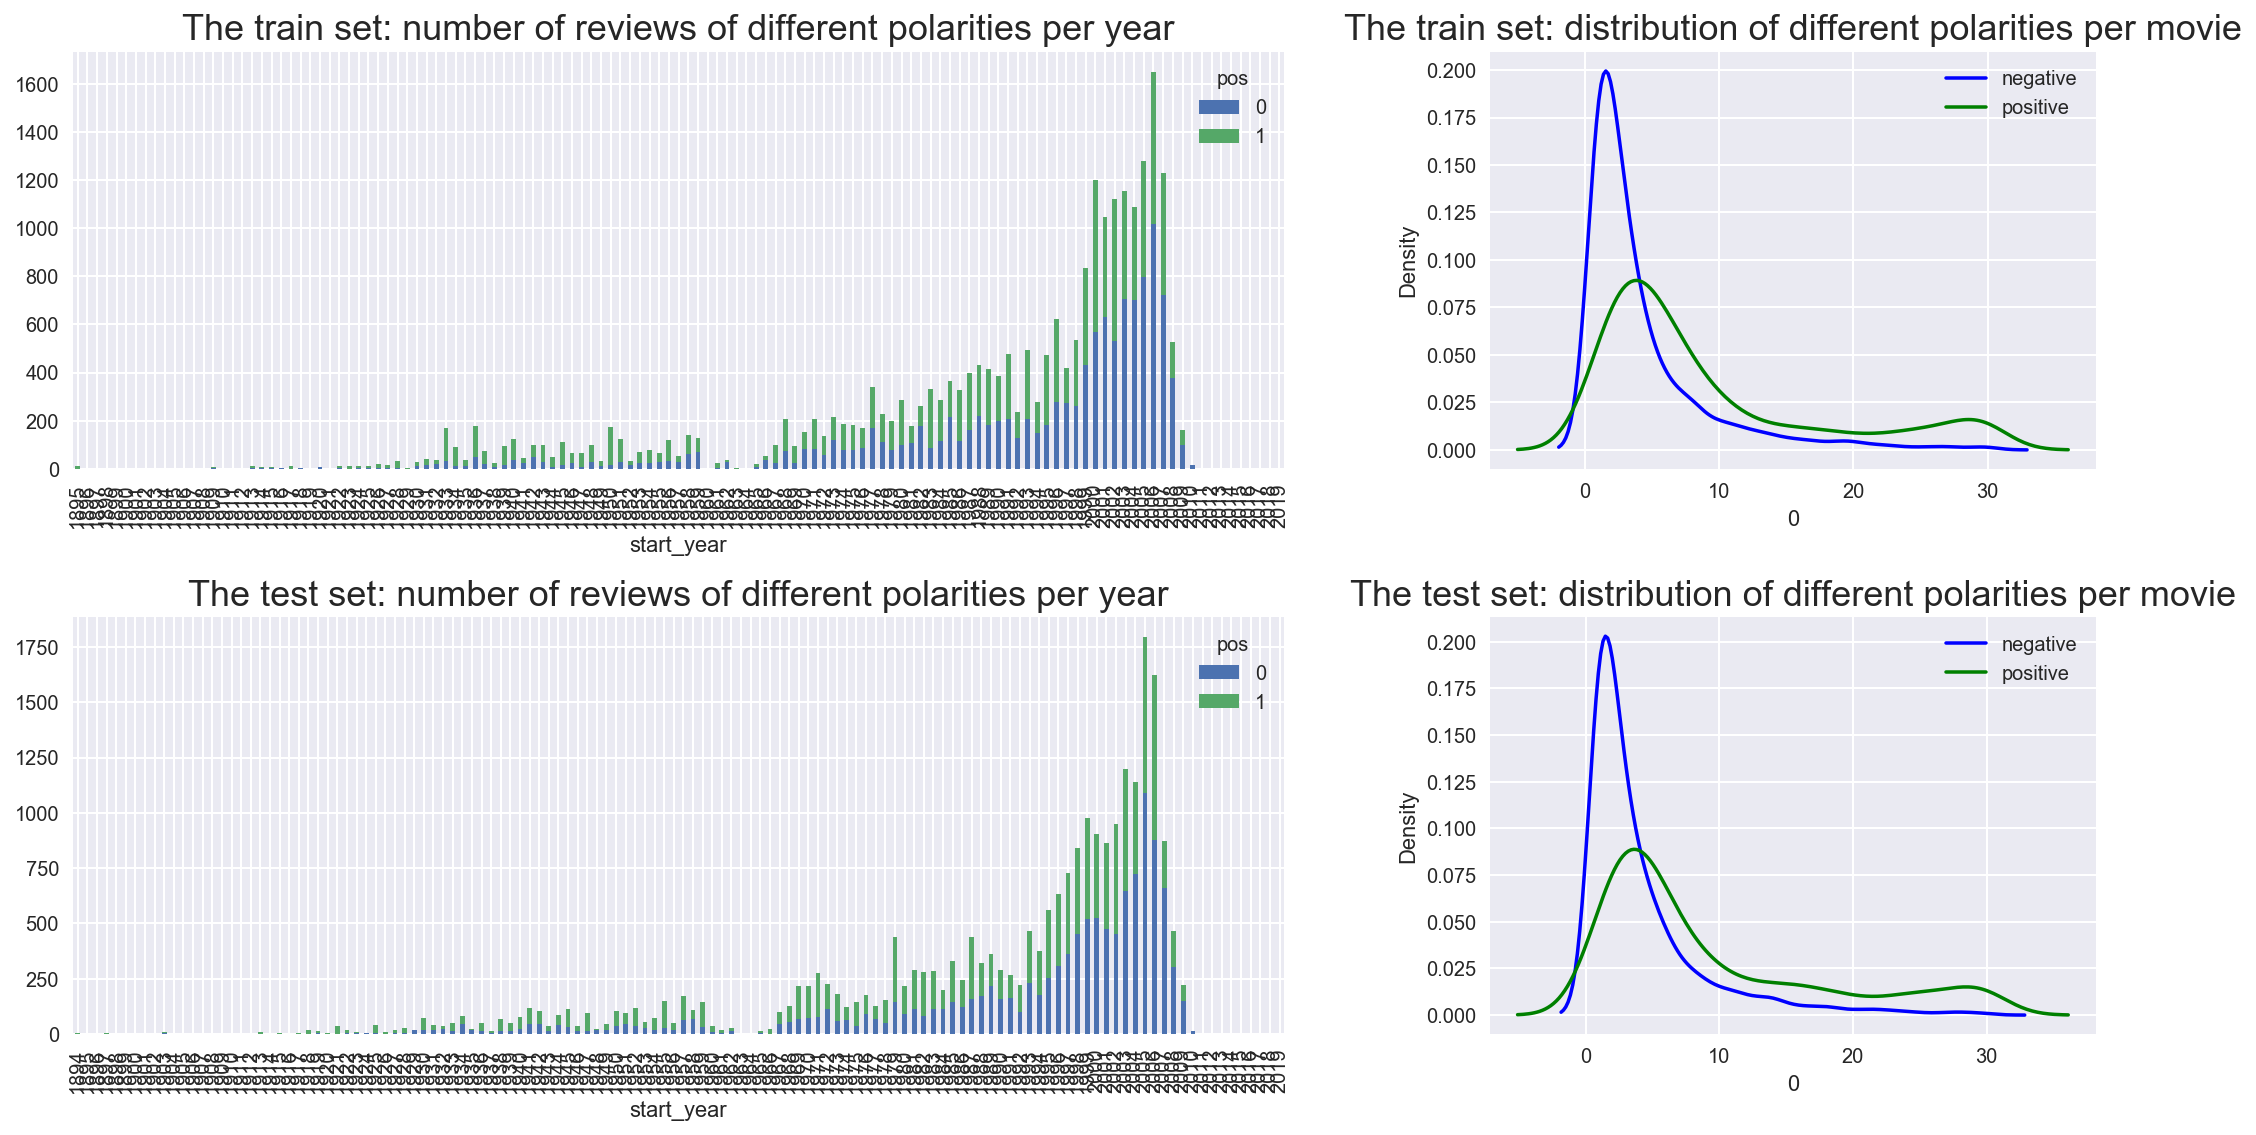

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year', fontsize=18)

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie', fontsize=18)

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year', fontsize=18)

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie', fontsize=18)

fig.tight_layout()

The distributions of the 2 classes of the train and test sets are very similar - it's a good sign, it means that a model trained on the train set should be predicting correctly on the test set as well.

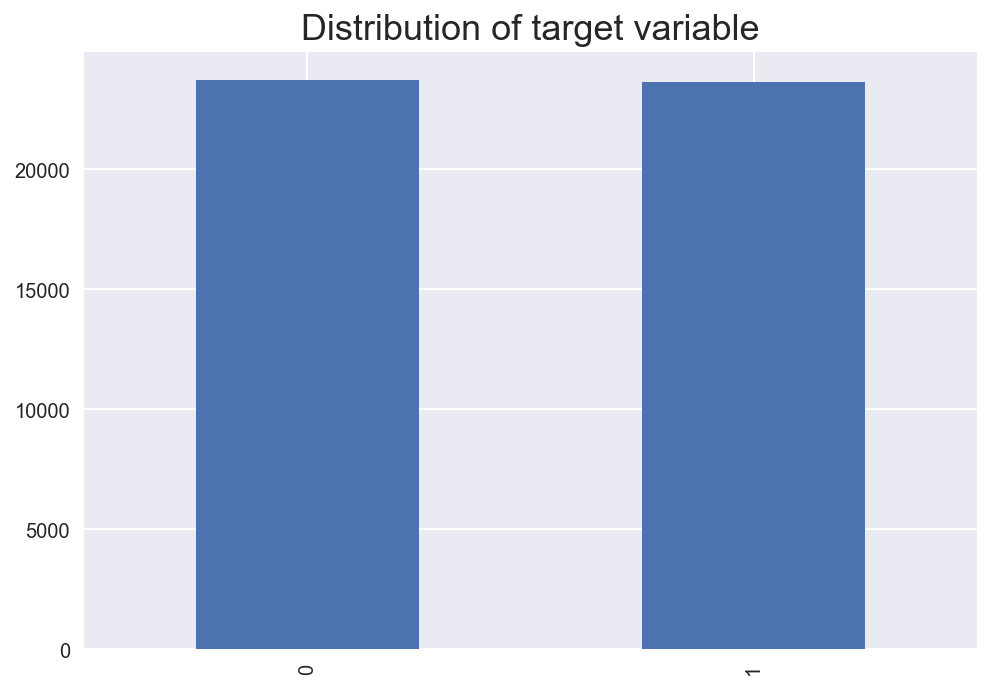

In [12]:
df_reviews['pos'].value_counts().plot(kind='bar')
plt.title('Distribution of target variable', fontsize=18);

We see that the classes are balanced - there is almost the same amount of positive as well as negative reviews.

## Preprocessing
### Missing values

In [13]:
df_reviews.dropna(how='any', inplace=True)

### Duplicates

In [14]:
df_reviews.duplicated().sum()

0

### Normalization

We assume all models below accept texts in lowercase and without any digits, punctuations marks etc.

In [15]:
corpus = df_reviews['review']

In [16]:
def clear_text(text):

    clean_text = re.sub(r'[^a-zA-z\']', ' ', text.lower())
    clean_text = " ".join(clean_text.split())

    return clean_text

In [17]:
df_reviews['review_norm'] = corpus.apply(lambda x: clear_text(x))

In [18]:
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i'm totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [19]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return eval_stats

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

X_train = df_reviews_train['review_norm']
y_train = df_reviews_train['pos']

X_test = df_reviews_test['review_norm']
y_test = df_reviews_test['pos']

print(X_train.shape)
print(X_test.shape)

(23796,)
(23533,)


## Working with models

### Model 1 - Constant

In [21]:
model_1 = DummyClassifier(strategy='constant', constant=1)
model_1.fit(X_train, y_train)

DummyClassifier(constant=1, strategy='constant')

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


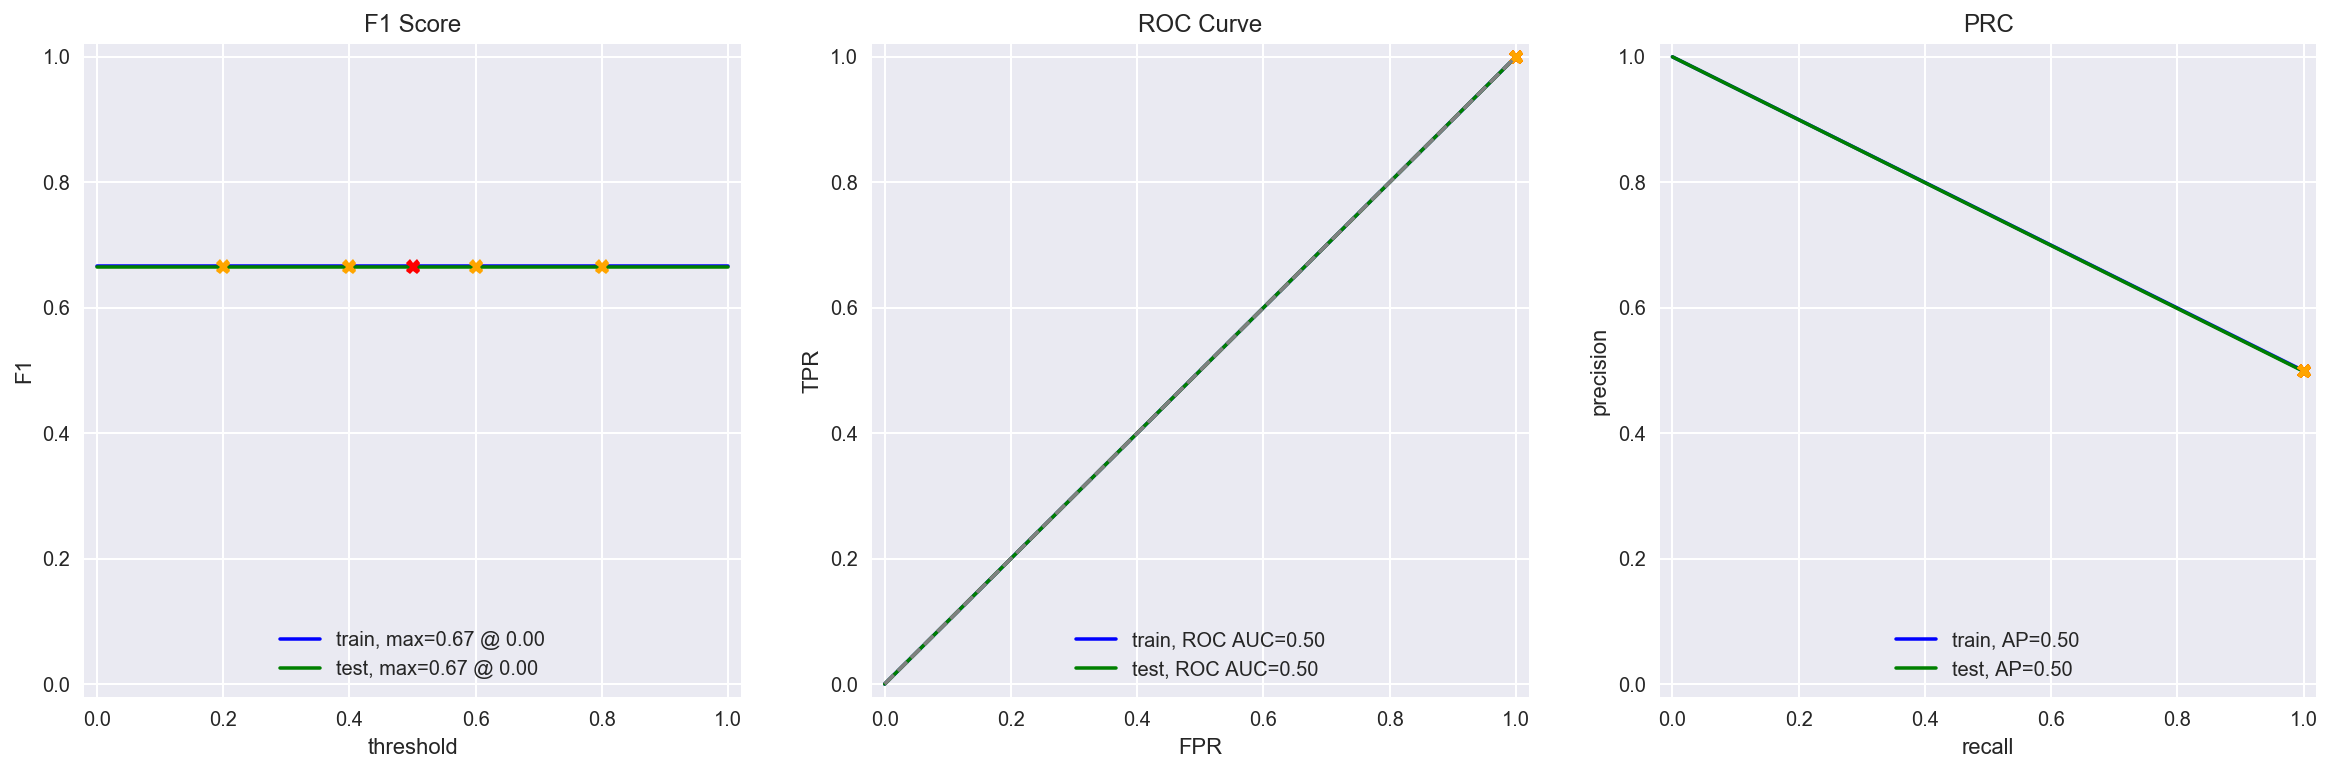

In [22]:
test_f1_model_1 = evaluate_model(model_1, X_train, y_train, X_test, y_test)['test']['F1']

### Model 2 - NLTK, TF-IDF and LR

TF-IDF

In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

tfidf_train = count_tf_idf.fit_transform(X_train)
tfidf_test = count_tf_idf.transform(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
model_2 = LogisticRegression(random_state=12345, solver='liblinear')
model_2.fit(tfidf_train, y_train)

LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


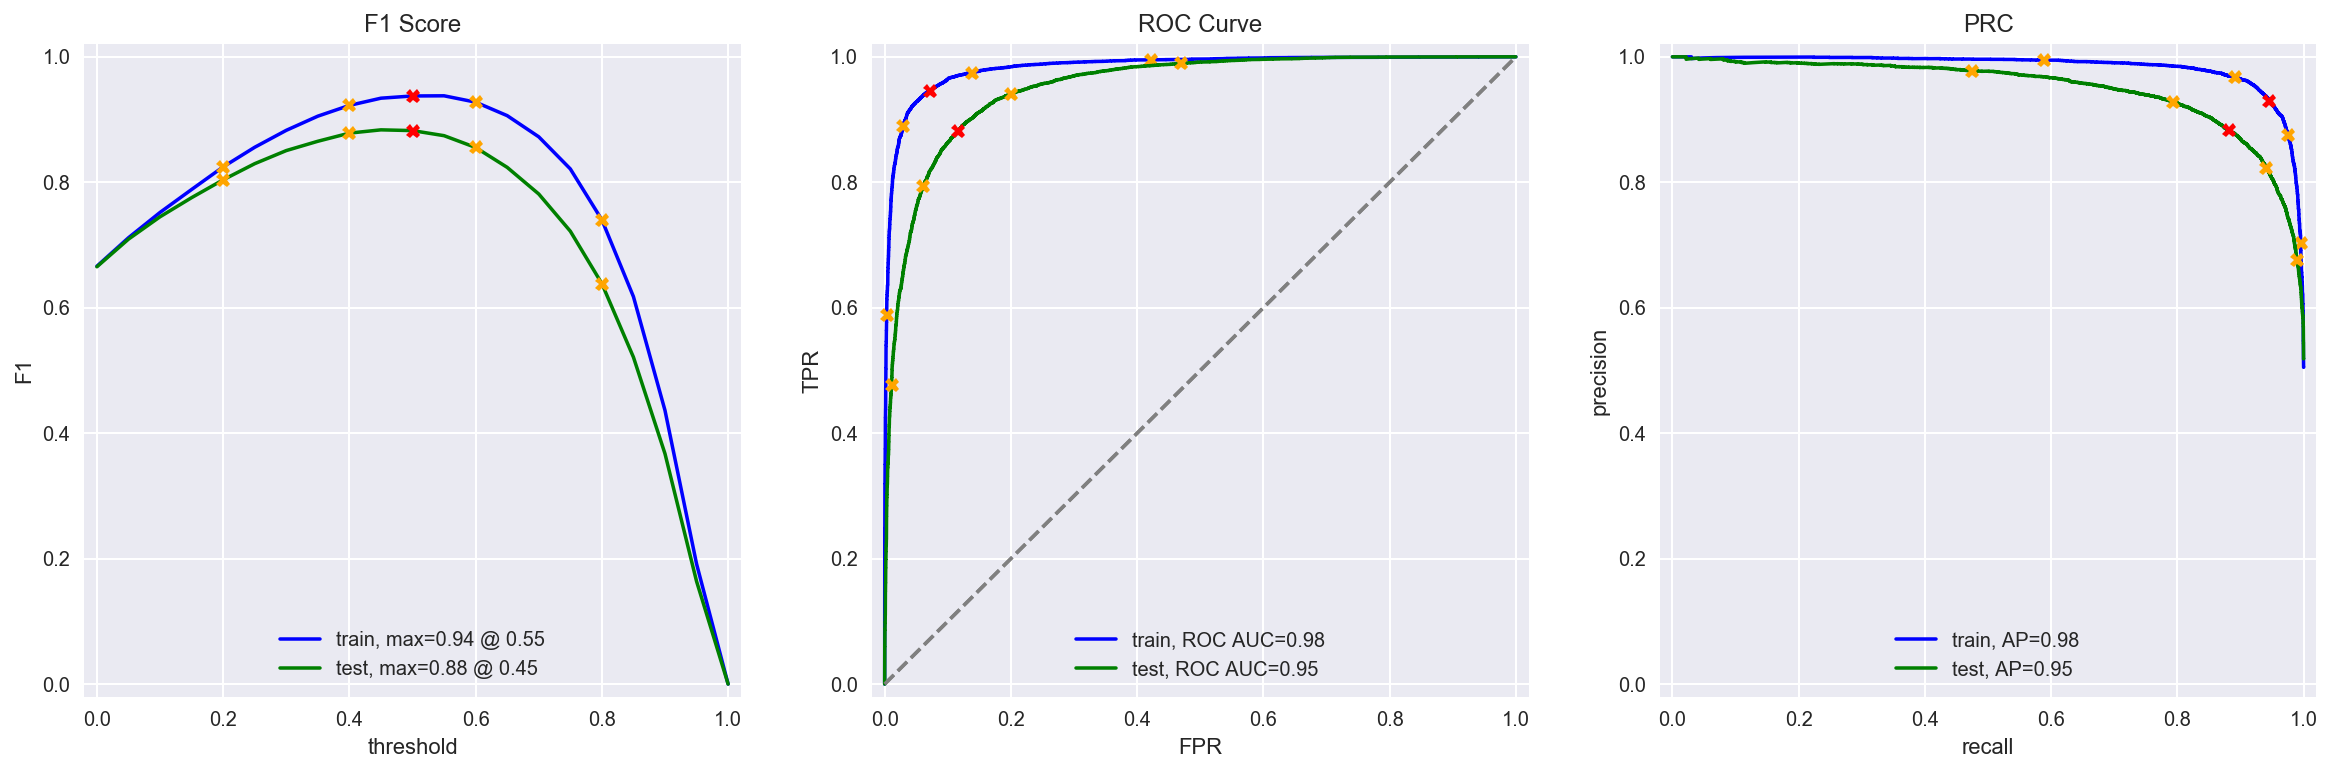

In [25]:
test_f1_model_2 = evaluate_model(model_2, tfidf_train, y_train, tfidf_test, y_test)['test']['F1']

<div class="alert alert-block alert-success">
<b>Success:</b> Great that vectorizer was trained only on train part.
</div>

### Model 3 - spaCy, TF-IDF and LR

In [26]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [27]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [28]:
corpus_preprocessed = corpus.progress_apply(text_preprocessing_3)

In [29]:
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

def lemmatize(text):

    doc = nlp(text)

    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)

    return ' '.join(lemmas)

In [30]:
corpus_lemm = corpus_preprocessed.progress_apply(lemmatize)

In [31]:
df_reviews['review_lemm'] = corpus_lemm

In [32]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

X_train_lemm = df_reviews_train['review_lemm']
y_train = df_reviews_train['pos']

X_test_lemm = df_reviews_test['review_lemm']
y_test = df_reviews_test['pos']

In [33]:
count_tf_idf_lemm = TfidfVectorizer(stop_words=stop_words)
tfidf_train_lemm = count_tf_idf_lemm.fit_transform(X_train_lemm)
tfidf_test_lemm = count_tf_idf_lemm.transform(X_test_lemm)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


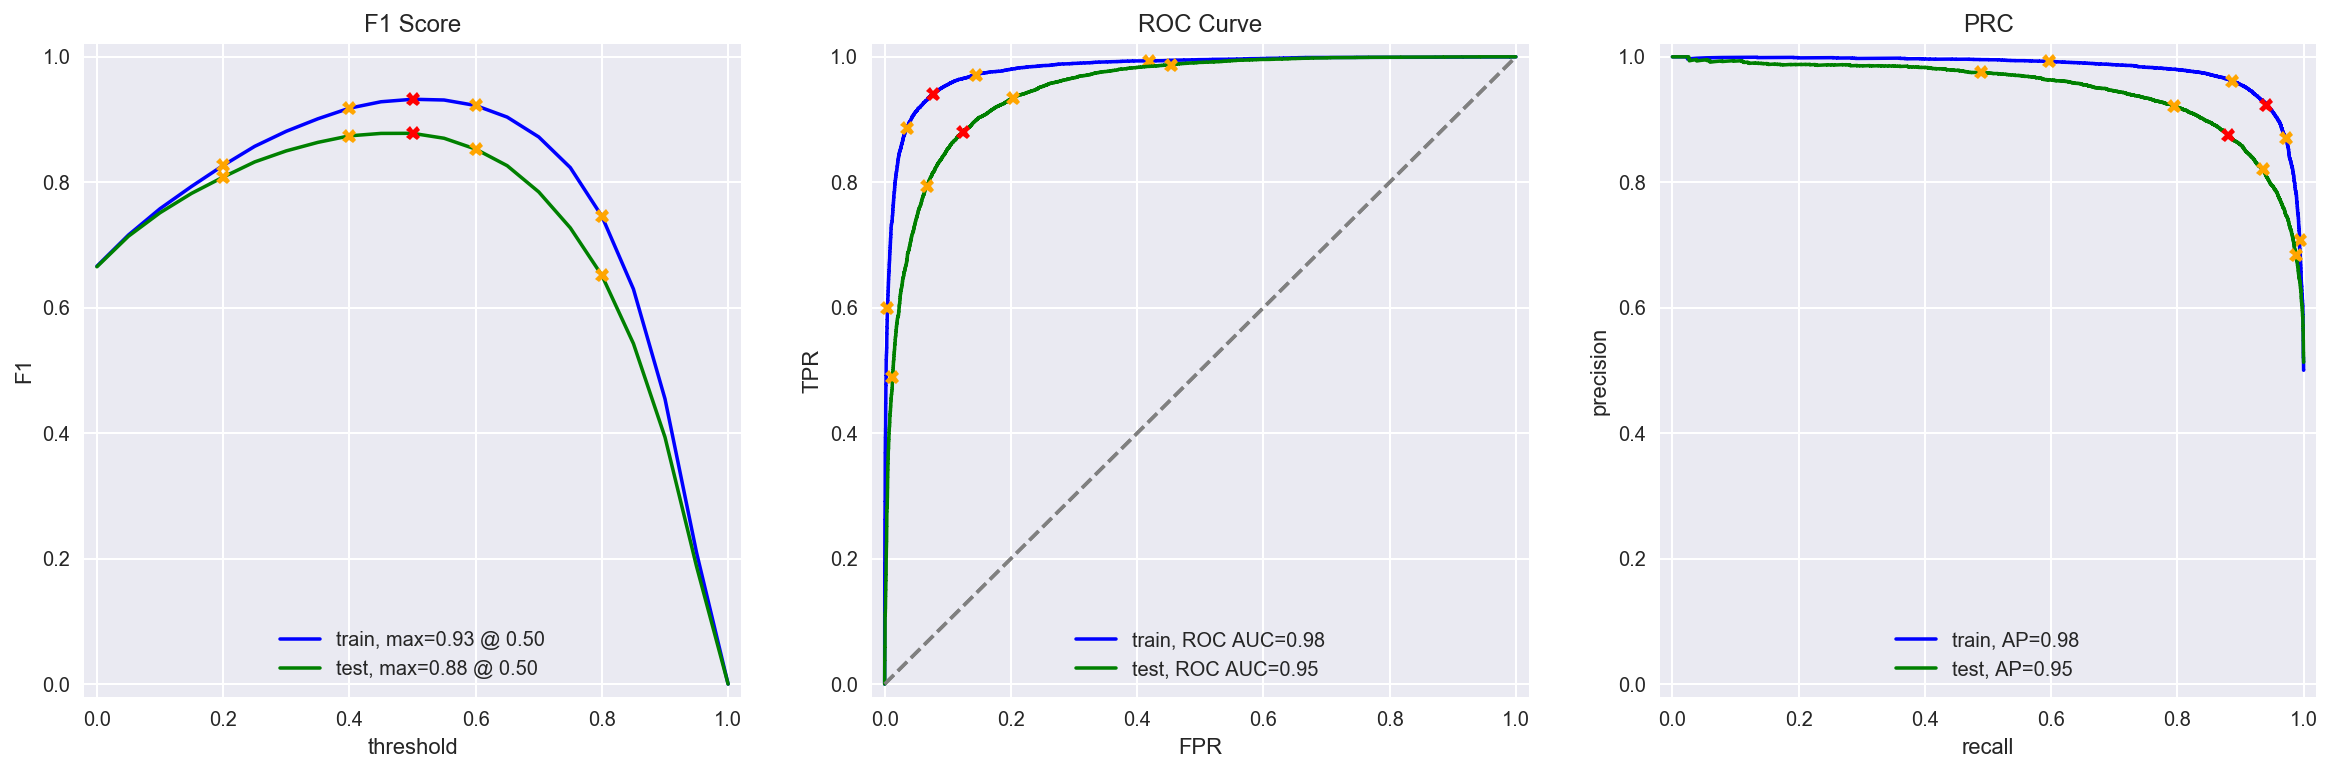

In [34]:
model_3 = LogisticRegression(random_state=12345, solver='liblinear')
model_3.fit(tfidf_train_lemm, y_train)

test_f1_model_3 = evaluate_model(model_3, tfidf_train_lemm, y_train, tfidf_test_lemm, y_test)['test']['F1']

### Model 4 - spaCy, TF-IDF and LGBMClassifier

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


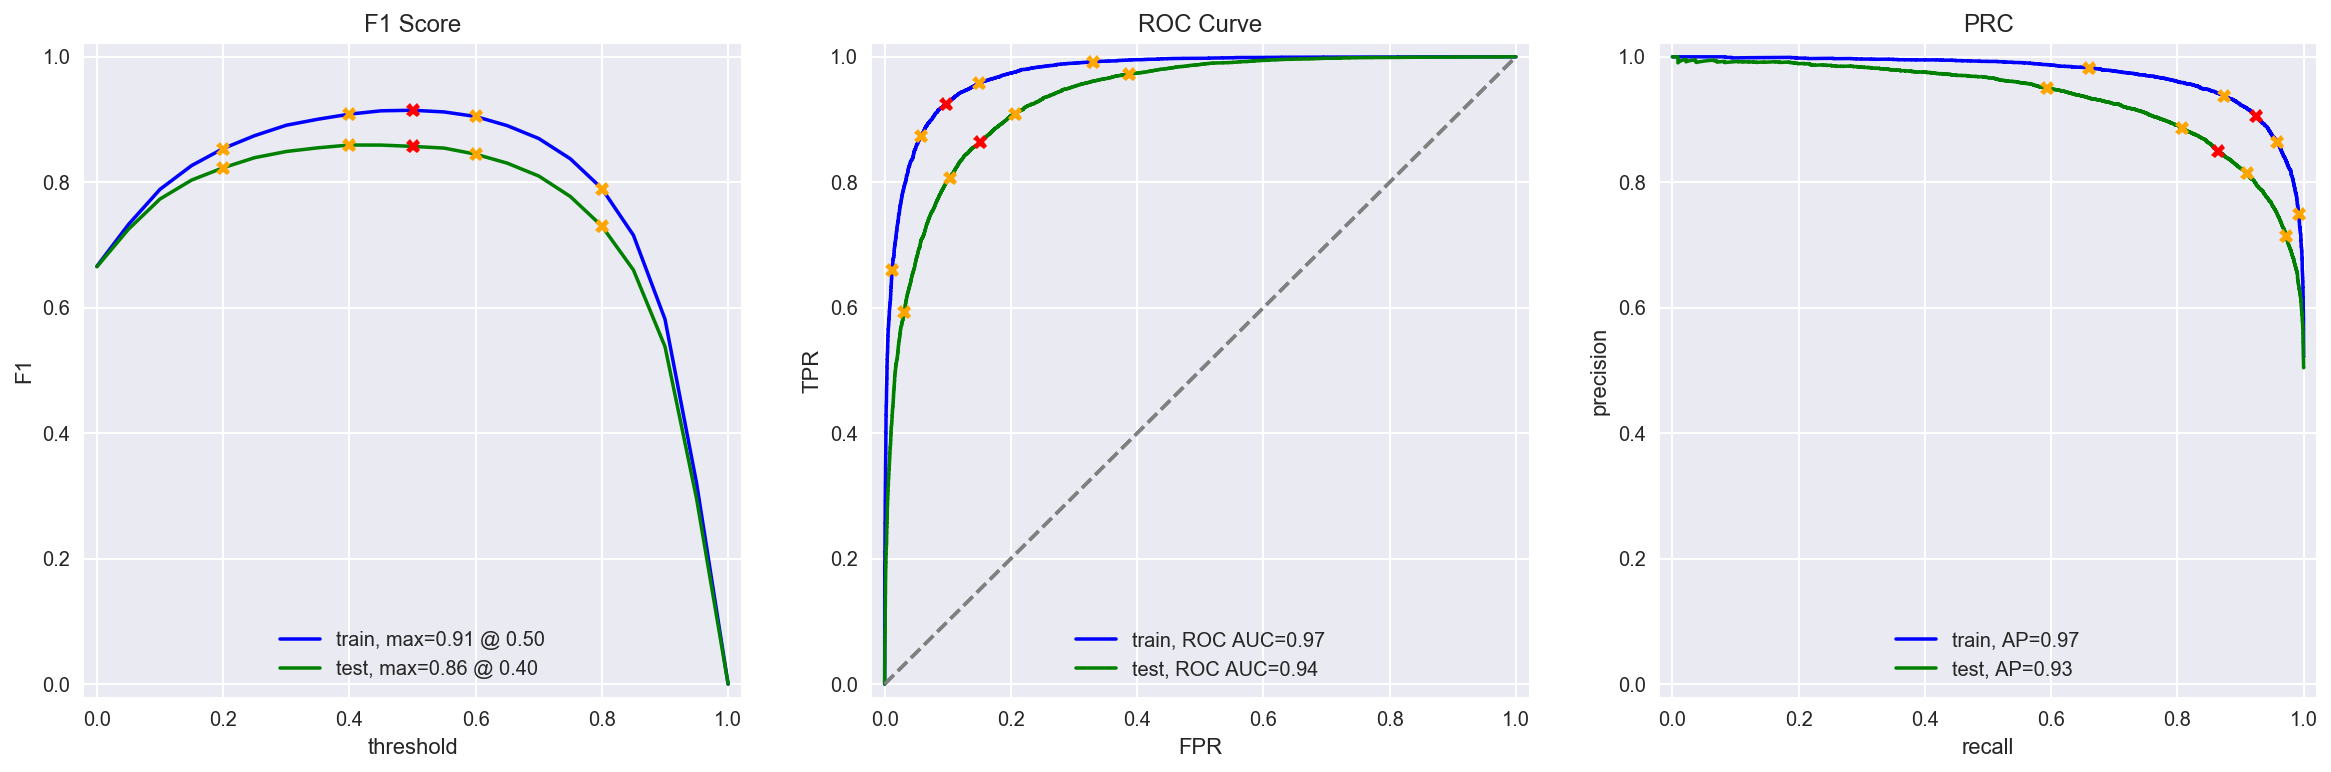

In [35]:
model_4 = LGBMClassifier(random_state=12345)
model_4.fit(tfidf_train_lemm, y_train)
test_f1_model_4 = evaluate_model(model_4, tfidf_train_lemm, y_train, tfidf_test_lemm, y_test)['test']['F1']

<div class="alert alert-block alert-info">
<b>Improve: </b> You could achieve a better score if you've used parameters tuning.
</div>

###  Model 5 - BERT

In [36]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    # <put your code here to create ids_list and attention_mask_list>
    
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    ids_list = texts.apply(lambda x: tokenizer.encode(x.lower(), add_special_tokens=True, truncation=True, max_length=max_length))
    
    ids_list = ids_list.apply(lambda x: np.array(x[:max_length] + [0]*(max_length - len(x))))
    attention_mask_list = ids_list.apply(lambda x: np.where(x != 0, 1, 0))
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)].reset_index(drop=True)).to(device)
        # <put your code here to create attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)].reset_index(drop=True)).to(device)
    
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [38]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

### Results

In [39]:
models = pd.DataFrame({
    'Model': ['baseline', 'NLTK+TFIDF+LR', 'spaCy+TFIDF+LR', 'spaCy+TFIDF+LGBM'],
    'Score': [test_f1_model_1, test_f1_model_2, test_f1_model_3, test_f1_model_4]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

''

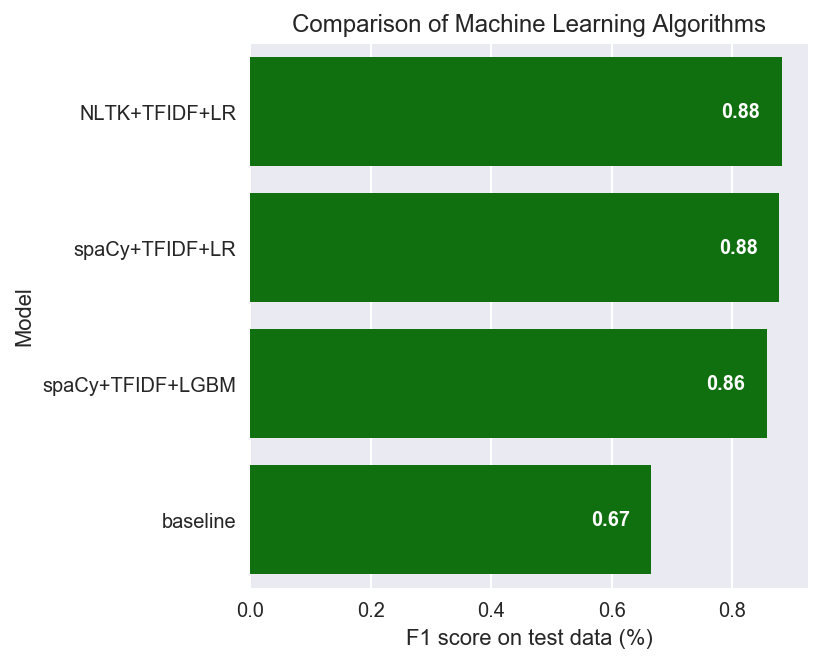

In [40]:
fig, axs = plt.subplots(1,1,figsize=(5,5)) 
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
values = models.sort_values(by='Score', ascending=False)['Score']
plt.title('Comparison of Machine Learning Algorithms')
plt.xlabel('F1 score on test data (%)')
plt.ylabel('Model')
for counter, value in enumerate(values):
    axs.text(value - 0.1, counter, round(value,2), color='white', va='center', fontsize=10, fontweight='bold')
;

Based on our research, the NLTK+TFIDF+LR model showed the best test F1 score - over 88%. The spaCy+TFIDF+LR model came close but its accuracy score it slightly lower. It also takes more preprocessing time, so we will recommend the first model to be the final one.

## Sanity check

In [41]:
print('F1 score increase', round((test_f1_model_2 - test_f1_model_1)/test_f1_model_1 * 100, 0), '%')

F1 score increase 33.0 %


The test F1 score of the final chosen model is 33% higher than that of the dummy classifier model, that we used as a baseline to analyze the model quality. It means that the modeling was useful.

## My Reviews

In [42]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: clear_text(x))

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 2

In [43]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.14:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn't expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 3

In [44]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_lemm.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.49:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.26:  i didn't expect the reboot to be so good writers really cared about the source material
0.50:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 4

In [45]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(count_tf_idf_lemm.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.59:  i did not simply like it not my kind of movie
0.40:  well i was bored and felt asleep in the middle of the movie
0.59:  i was really fascinated with the movie
0.37:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.70:  i didn't expect the reboot to be so good writers really cared about the source material
0.68:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.25:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.78:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


# Conclusion

The **goal** of this project was to develop a model that classifies movies reviews into positive and negative ones.

The F1 score on the test set should be at least 0.85. 

I have completed the following steps in this project:

**1.Descriptive statistics**

**2.Data preprocessing**

I removed a few missing values and checked the data for duplicates. I also normalized the reviews by removing  any digits, punctuations marks etc. and converting them to lower case letters. 
   
**3.EDA**

I analyzed both features and targets and noticed an overall tendency of the growth of movie reviews over the years, with the peak being in 2006.
I found that most often there is just one or a few reviews per movie, although more than 400 movies (probably the most popular ones) have 30 reviews.
The overall distributions of ratings among the train and test sets are quite similar, could probably use this feature in our model.

The distributions of the 2 classes of the train and test sets are very similar - it's a good sign, it means that a model trained on the train set should be predicting correctly on the test set as well.
The classes are balanced - there is almost the same amount of positive as well as negative reviews.
    
**4.Splitting the data**

Data was split into train and test sets almost equally, according to the preexisting split.

**5.Model selection**

I have experimented with the TF-IDF. BERT after a couple attempts didn't run on my PC, so as it was not nessasary, I excluded BERT enbedings from this project. 
Besides, I tried 2 libraries for text preprocessing - nltk and spaCy.
Both Linear Regression and LightGBM models were used.

**6.Sanity check**

The test F1 score of the final chosen model is 33% higher than that of the dummy classifier model, that was used as a baseline to analyze the model quality. It means that the modeling was useful.

**7. Results**

Based on the research, **the NLTK+TFIDF+LR model showed the best test F1 score - over 88%.** The spaCy+TFIDF+LR model came close but its accuracy score it slightly lower. It also takes more preprocessing time, so I would recommend the first model to be the final one.

I have also tested our models on new reviews. It seems that all models predict better negative than positive reviews. Our chosen model (model 2) misclassified 2 positive reviews, the rest was predicted correctly.